<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Ruiz , Ricardo Rodriguez

**Fecha:** 17 de septiembre del 2020.

**Expediente** : IF707135.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 15

## Enunciado de tarea 
Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

### Ejercicio 1:
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     
import pandas as pd

In [2]:
def int_montecarlo(f, a, b, U):
    return (b-a)/len(U)*np.sum(f(U))

In [3]:
F = lambda x: x**2

In [4]:
def int_estratificado(t):
    U_2 = np.random.rand(t)
    i = np.arange(0,t)
    int_estratificado = (U_2+i)/t
    return int_estratificado

In [5]:
N = np.logspace(1,7,7,dtype=int)
estratos = list(map(lambda x: int_estratificado(x),N))
muestras = list(map(lambda x : F(x),estratos))
medias = (list(map(lambda x : np.mean(x),muestras)))

### Ejercicio 2:
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:

In [6]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
I_mc = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo crudo"] = I_mc
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo crudo"]-I)*100/I
df.loc[N,"Muestreo estratificado"] = medias
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.403058,20.917520,0.329549,1.135305e+00
100,0.333834,0.150302,0.333268,1.972456e-02
1000,0.326090,2.172936,0.333328,1.644732e-03
10000,0.330319,0.904181,0.333333,7.155919e-05
100000,0.332606,0.218207,0.333333,1.098991e-06
1000000,0.333481,0.044175,0.333333,4.543054e-08
10000000,0.333326,0.002223,0.333333,6.117157e-09


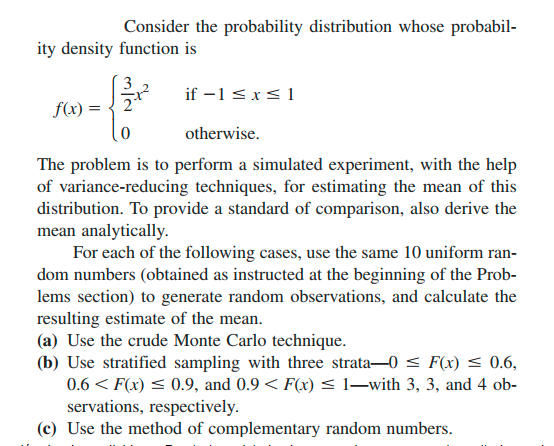
    
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

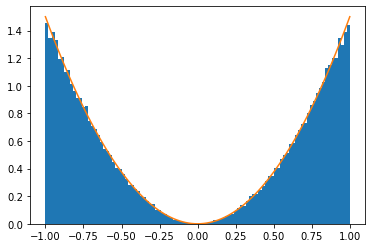

In [11]:
f_x=lambda x: 3*x**2/2 if x>=-1 and x<=1 else 0 
x1 = lambda x: x**(1/3) if x>=0 else -(-x)**(1/3)
x2 = lambda u: x1(2*u-1)
N= 10**5
u1= np.random.uniform(0,1,N)
f_u1= list(map(lambda x:x2(x), u1))
f_u1 = np.asarray(f_u1)
y, x, p= plt.hist(f_u1, bins= 100, density=True)
y2= list(map(lambda x: f_x(x), x))
plt.plot(x,y2)
plt.show()

## a) Montecarlo Crudo

In [12]:
# Crude MonteCarlo technique
print(f_u1.mean())

0.0008196029957459106


## b) Muestreo estratificado 

In [13]:
# Stratified sample technique
np.random.seed(100)
r1= np.random.uniform(0,.6,3)
r2= np.random.uniform(.6,.9,3)
r3= np.random.uniform(.9,1,4)
r=[r1,r2,r3]

w1 = (3/10)/.6
w2 = (3/10)/.3
w3 = (4/10)/.1
w=[w1,w2,w3]

muestras2= list(map(lambda x,a: np.asarray([x2(i) for i in x])/a,r,w))
media = np.concatenate(muestras2).mean()
media

-0.16346936901447945

## c) Método complementario 

In [14]:
u1= np.random.rand(5)
u2= 1-u1
U = [u1,u2]
muestras3 = list(map(lambda u:np.asarray([x2(u) for u in x]), U))
muestras3 
np.concatenate(muestras3).mean()

-0.6200231018077821

## d) Estratificado 2

In [15]:
f_xi = lambda u: -(-2*u+1)**(1/3) if u<.5 else (2*u-1)**(1/3)

def estratif(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v

N_estratos = [2, 4, 6, 10]
muestras4 = list(map(estratif,N_estratos))
al = list(map(lambda m_i:list(map(lambda m:f_xi(m),m_i)),muestras4))
m_estratos = list(map(lambda i:np.mean(i),al))

resultados = list(map(lambda b,mean:print((b,mean)),N_estratos,m_estratos))

(2, 0.32764238072615637)
(4, -0.0029039483391337106)
(6, -0.03118705849138363)
(10, -0.018379701278666515)
